Another graphics package (like plot) is Makie: https://docs.makie.org/stable/

It too has several backends, including:
CairoMakie = Nicer but less interactive
GLMakie = (As in OpenGL) - more interactive but often less suitable for publication

You can find examples here: 
http://juliaplots.org/MakieReferenceImages/gallery/index.html 
and here:
https://docs.makie.org/stable/tutorials/

and here: 
https://juliadatascience.io/glmakie

In [12]:
using CairoMakie

Do we want the graphics to be in the same window as the code? (Embedded in the jupyter notebook or in an adjacent pane)

In [6]:
Makie.inline!(true)

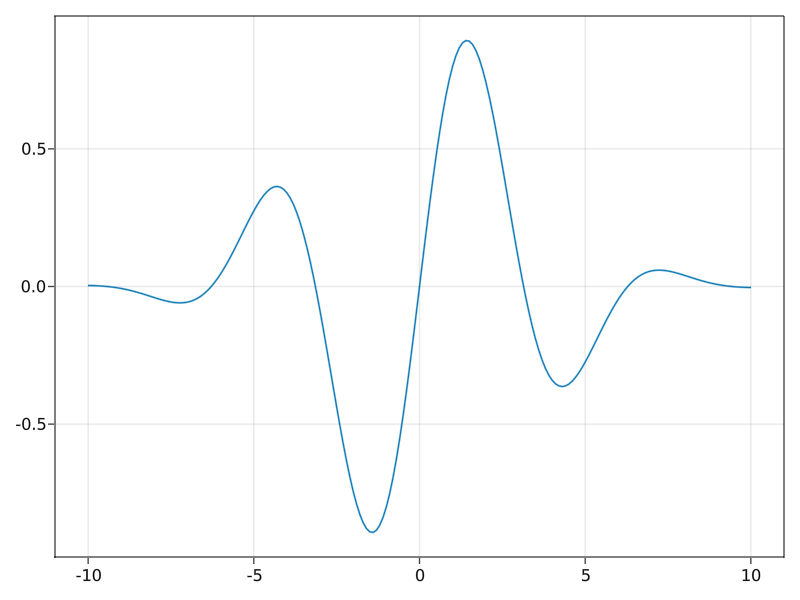

In [8]:
σ=10
x=-10:0.1:10
y=exp.(-x.^2/(2σ)).*sin.(x)
lines(x,y)

Two overlayed plots:

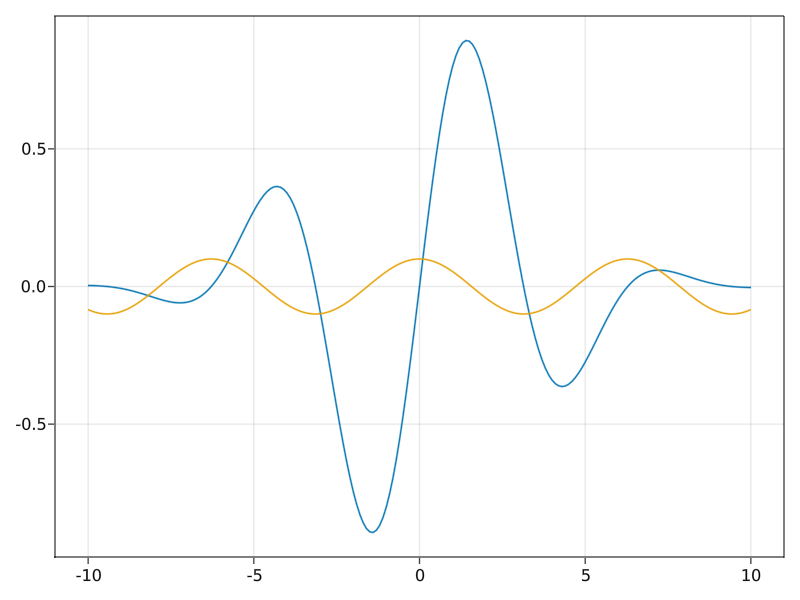

In [9]:
lines(x, y)
lines!(x, 0.1*cos.(x))
current_figure()

Someone mentioned a legend?

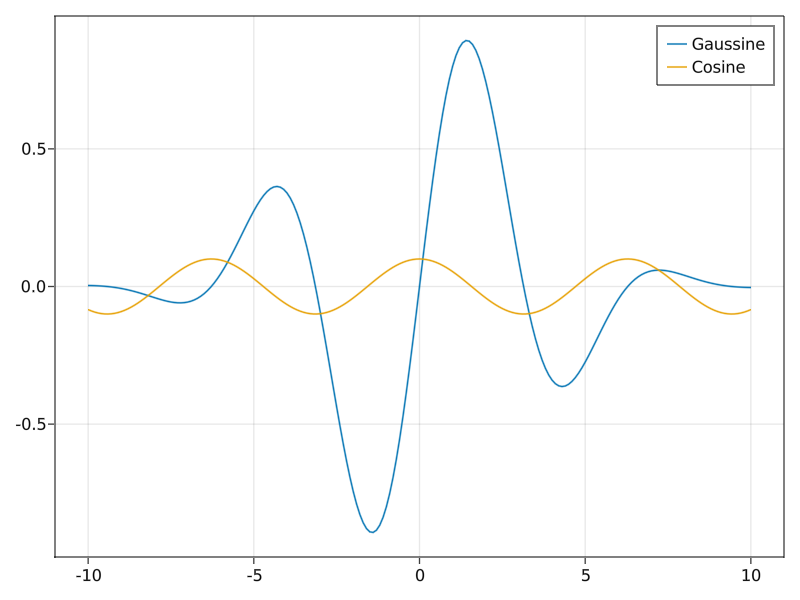

In [10]:
lines(x, y, label="Gaussine")
lines!(x, 0.1*cos.(x), label="Cosine")
axislegend()
current_figure()

If you want to change the output type to vector form.

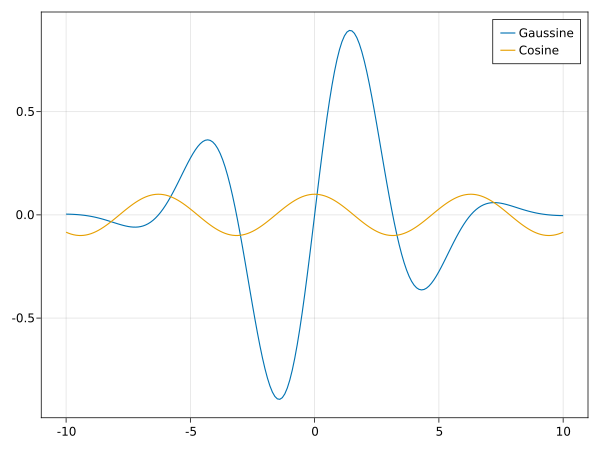

In [13]:
CairoMakie.activate!(type = "svg") # The standard is png
lines(x, y, label="Gaussine")
lines!(x, 0.1*cos.(x), label="Cosine")
axislegend()
current_figure()

In [16]:
save("Gaussine_from_Makie.pdf", current_figure())

CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x0000000286cf2a00, 600.0, 450.0, IOContext(IOStream(<file /Users/shaviv/julia-workshop-and-snippets/2-Data-Handling-Plotting/Gaussine_from_Makie.pdf>)))


This is the OpenGL backend. It can draw on a separate window or inlined (in Jupyter) or in an adjacent pane. If it is a separate window, the scene is interactive.

In [1]:
using GLMakie

Try true / false

In [46]:
Makie.inline!(true)

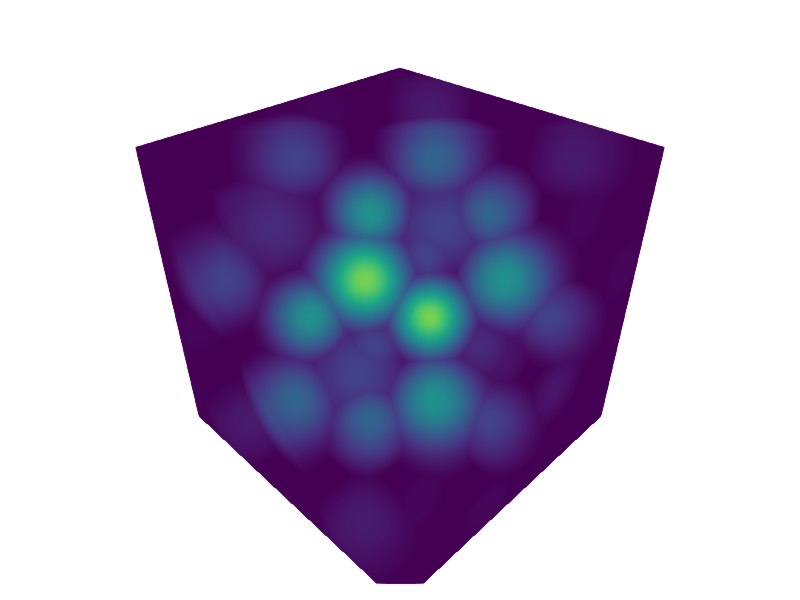

In [3]:
σ=10
x = -5:0.2:5
y = -5:0.2:5
z = -5:0.2:5

ϕ = [exp(-(x^2+y^2+z^2)/(2σ))*sin(x)*cos(y)*sin(z) for x in x, y in y, z in z]

volume(ϕ, algorithm = :mip, show_axis = false, show = true)  # mip = maximum intensity projection

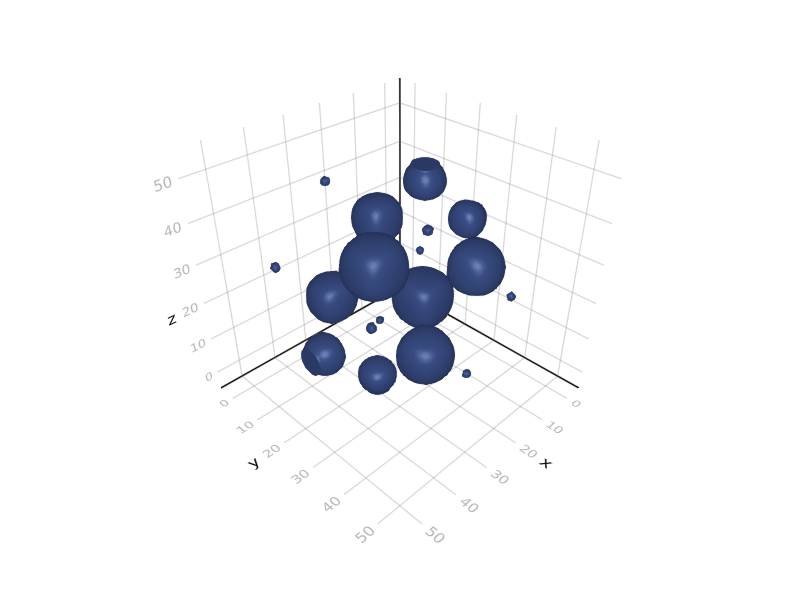

In [14]:
volume(ϕ, algorithm = :iso, isovalue = 0.25, show_axis = true, show = true)

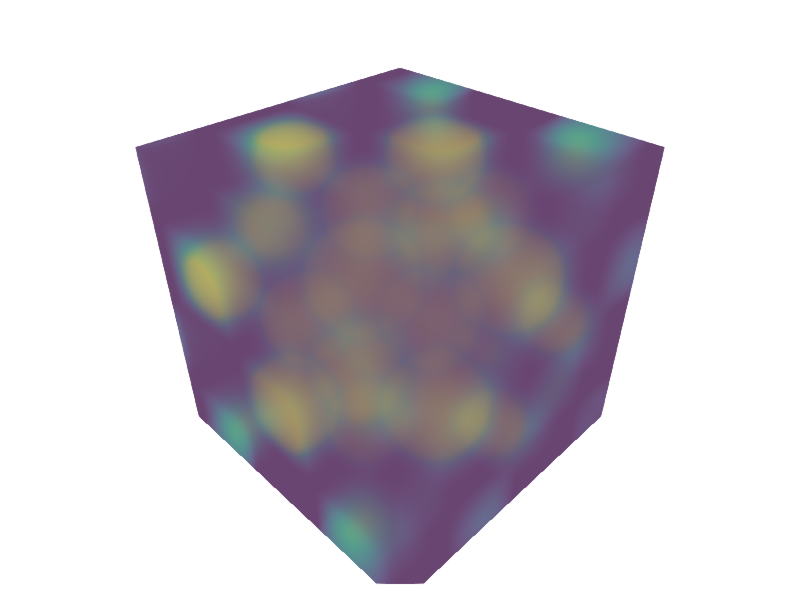

In [18]:
volume(ϕ*10, algorithm = :absorption, show_axis = false, show = true)

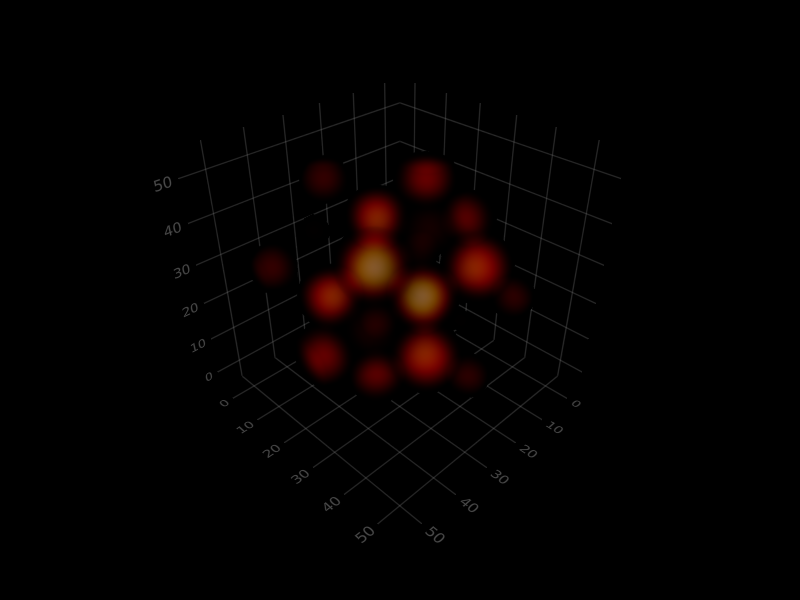

In [47]:
set_theme!(backgroundcolor = :black)

ϕcut = map(x->x > 0.1 ?  x-0.1 : 0.0 , ϕ);
mini, maxi = extrema(ϕcut);
normed = (ϕcut .- mini) ./ (maxi - mini);

colors = to_colormap(:hot)
n = length(colors)
alpha = [0;[(i/n)^0.25 for i in 1:n-1]]
cmap_alpha = RGBAf.(colors, alpha)

volume(normed, algorithm = :absorption, colormap=cmap_alpha, absorption=6.0f0, show_axis = true)